In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import math
import time
import numpy as np
import torch
from src import helpers

In [2]:
n = 10_000
a = torch.ones(n)
b = torch.ones(n)


In [3]:
c = torch.zeros(n)
timer = helpers.Timer()
for i in range(n):
    c[i] = a[i]+b[i]
print(f"took {timer.stop():.5f} seconds")

took 0.06178 seconds


In [4]:
timer.start()
d = a+b
print(f"took {timer.stop():.5f} seconds")

took 0.00034 seconds


In [5]:
## NORMAL Distribution
## Linear Regression & Normal Distr. (aka Gaussian distr.) was both invented by Gauss in 1795

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2*math.pi*sigma**2)
    return p * np.exp(-((x-mu)**2)/(2*sigma**2))

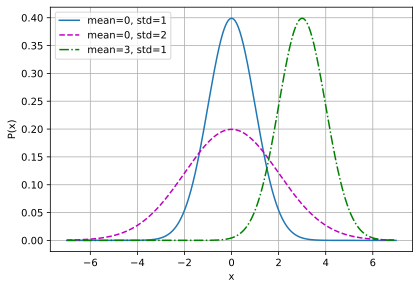

In [6]:
## use numpy for visualization
x = np.arange(-7, 7, 0.01)

## mean and std pairs
params = [(0,1), (0,2), (3,1)]
helpers.plot(
    x, 
    [normal(x, mu, sigma) for mu, sigma in params],
    xlabel="x",
    ylabel="P(x)",
    figsize=(6.5, 4.5),
    legend=[f"mean={mu}, std={sigma}" for mu, sigma in params]
)



## Linear Regression from SCRATH

In [7]:
%matplotlib inline
import random
import torch


In [8]:
## GOLD values
gold_w = torch.tensor([2, 3.4])
gold_b = 4.2
gold_mu = 0.0
gold_sigma = 0.01
num_examples = 10_000

In [9]:
features, labels = helpers.synthetic_data(gold_w, gold_b, num_examples)

In [10]:
features.shape, labels.shape

(torch.Size([10000, 2]), torch.Size([10000, 1]))

In [11]:
features[:4, :]

tensor([[ 1.3579, -0.8511],
        [-0.1434,  0.1355],
        [-1.1411,  0.1903],
        [ 1.3414,  0.1825]])

In [12]:
labels[:4]

tensor([[4.0371],
        [4.3706],
        [2.5611],
        [7.5065]])

In [13]:
helpers.set_figsize()

In [14]:
features[:, (1)].shape

torch.Size([10000])

In [15]:
features[:].shape

torch.Size([10000, 2])

In [16]:
features[:4, (1)]

tensor([-0.8511,  0.1355,  0.1903,  0.1825])

In [17]:
features[:4]

tensor([[ 1.3579, -0.8511],
        [-0.1434,  0.1355],
        [-1.1411,  0.1903],
        [ 1.3414,  0.1825]])

In [18]:
features[:4, 1]

tensor([-0.8511,  0.1355,  0.1903,  0.1825])

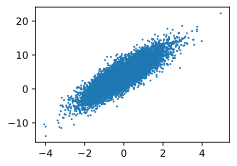

In [19]:
plt.scatter(
    features[:, 1].detach().numpy(),
    labels.detach().numpy(),
    s=1,     ## size of the marker
)

In [20]:
helpers.data_iter??

Signature: helpers.data_iter(batch_size, features, labels)
Source:   
def data_iter(batch_size, features, labels):
    """Iterate through the whole dataset consisting of (features, labels) with batch-wise random smapling"""
    num_examples = len(features)
    idxs = list(range(num_examples))
    ## randomly sample from the indices
    random.shuffle(idxs)
    for i in range(0, num_examples, batch_size):
        batch_idxs = torch.tensor(idxs[i : min(i + batch_size, num_examples)])
        yield features[batch_idxs], labels[batch_idxs]
File:      ~/Desktop/flashAI/sutram/d2l/src/helpers.py
Type:      function


In [27]:
bs = 10
for X, Y in helpers.data_iter(bs, features, labels):
    print(f"{X}\n\n{Y}")
    print("--"*20)
    break

tensor([[ 1.8459,  0.8984],
        [-0.3010, -0.7295],
        [ 0.4222,  1.0394],
        [ 0.3569, -0.1652],
        [-0.2927, -0.5029],
        [ 0.1777, -1.3517],
        [ 0.4329, -1.8612],
        [ 0.3655, -0.0588],
        [-0.6902, -2.7384],
        [ 0.8596,  1.6798]])

tensor([[10.9581],
        [ 1.1179],
        [ 8.5757],
        [ 4.3286],
        [ 1.9128],
        [-0.0499],
        [-1.2605],
        [ 4.7353],
        [-6.4871],
        [11.6254]])
----------------------------------------


In [28]:
## Initializing model parameters

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
